# Problem statement 2:
Restaurant manager claims that the average total bill is more in dinner than lunch?Validate the claim at 5% Level of significance.

In [2]:
 import pyforest
pyforest.lazy_imports()

['from sklearn.preprocessing import StandardScaler',
 'import plotly as py',
 'import matplotlib.pyplot as plt',
 'import bokeh',
 'import keras',
 'from sklearn.ensemble import RandomForestRegressor',
 'import tqdm',
 'from openpyxl import load_workbook',
 'import pydot',
 'import sklearn',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import fastai',
 'from scipy import stats',
 'from PIL import Image',
 'from pyspark import SparkContext',
 'from pathlib import Path',
 'from sklearn.linear_model import Lasso',
 'import dash',
 'import matplotlib as mpl',
 'from sklearn.model_selection import KFold',
 'import torch',
 'import skimage',
 'import altair as alt',
 'from sklearn.manifold import TSNE',
 'import textblob',
 'import pandas as pd',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn.preprocessing import RobustScaler',
 'import xgboost as xgb',
 'from sklearn.preprocessing import MinMaxScaler',
 'import pickle',
 'from sklearn.ensemble i

In [4]:
df=sns.load_dataset('tips')
df.head()

<IPython.core.display.Javascript object>

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# Step 0:Assumptions:
## 1st Assumption Tets of Normality Shapiro Test

In [10]:
df.groupby('time')['total_bill'].describe()

C:\Users\SFDCL\AppData\Local\Temp\ipykernel_6880\1293134793.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('time')['total_bill'].describe()


,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Lunch,68.0,17.168676,7.713882,7.51,12.2350,15.965,19.5325,43.11
Dinner,176.0,20.797159,9.142029,3.07,14.4375,18.390,25.2825,50.81


since the sample size of lunch tb and dinner tb>30 ;as per CLT -normality is taken here

# Variance equality -levene test

In [18]:
# Variance equality -levene test
# H0 pop_var_lunch tb= pop var_dinner tb
#H1  pop_var_lunch tb! = pop var_dinner tb

tbl=df[df.time=='Lunch']['total_bill']
print(tbl)
tbd=df[df.time=='Dinner']['total_bill']
stats.levene(tbl,tbd)

77     27.20
78     22.76
79     17.29
80     19.44
81     16.66
       ...  
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
Name: total_bill, Length: 68, dtype: float64


<IPython.core.display.Javascript object>

LeveneResult(statistic=2.6906995489829337, pvalue=0.1022346107726258)

since p value(0.1) > alpha(0.05)--> accept H0;
Hence we can conclude that pop variances of lunch and dinner total bill are same.

In [21]:
print(tbl.var(),tbd.var())

59.50397284899036 83.576697025974


# since numerical var total bill and categorical variable is time (2 Categories )& unknown sigmas
# two sample independent t test (test of mean)

In [24]:
alpha=0.05

In [28]:
stats.ttest_ind(tbd,tbl,equal_var=True,alternative='greater')

<IPython.core.display.Javascript object>

TtestResult(statistic=2.8976375218366424, pvalue=0.002052310703797837, df=242.0)

In [32]:
# Test the claim that the weight reduction program is effective in reduction of weight with below sample data of 10 people @5% level
# of significance.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
wt_before=np.array([90,87,67,99,110,88,78,77,97,100])
wt_after=np.array([80,77,77,89,90,78,78,87,87,90])
diff=wt_after-wt_before
diff

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([-10, -10,  10, -10, -20, -10,   0,  10, -10, -10])

<IPython.core.display.Javascript object>

C:\Users\SFDCL\AppData\Local\Temp\ipykernel_6880\207595355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)


<Axes: ylabel='Density'>

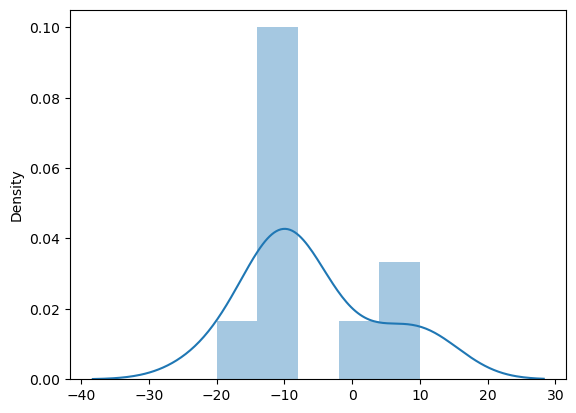

In [56]:
sns.distplot(diff)

In [58]:
# Test of Normality : H0: pop data =Normal;H1:pop data !=Normal
# Shapiro test
stats.shapiro(diff)

<IPython.core.display.Javascript object>

ShapiroResult(statistic=0.8007018955393095, pvalue=0.014786100185168585)

In [ ]:
# since p value(0.014) <alpha(0.05) --> reject H0 .hence pop data is not following normal
# hence we can use parametric test(paired t test) we have to use equivalent non parametric test
# wilcoxon signed rank test is used

In [60]:
# H0: pop median difference>=0
# H1: pop median difference<0
stats.wilcoxon(wt_after,wt_before,alternative='less')

<IPython.core.display.Javascript object>

WilcoxonResult(statistic=9.0, pvalue=0.0416322583317752)

In [62]:
# since p value(0.04) <alpha(0.05) ==reject H0
#hence we can conclude that the population median difference <0
# the wt reduction program is effective in reducing the median weight;

# Test of Proportion -One Sample

In [69]:
# H0: p=0.4
# H1 : P!=0.4

In [71]:
df.smoker.value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [85]:
x=93 # no of smoking transaction
n=244 # sample size
P=0.4
alpha=0.05
p=x/n #sample proportion
q=1-p
std_error=np.sqrt(p*q/n)
z_stat=(p-P)/std_error
p_value=stats.norm.sf(abs(z_stat))*2
print(z_stat,p_value)
p_value


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-0.6063491832694735 0.5442829052719291


0.5442829052719291

In [79]:
from statsmodels.stats.proportion import proportion_confint,proportions_ztest

In [83]:
proportions_ztest(x,n,P)

(-0.6063491832694735, 0.5442829052719291)

Inference :since p value (0.544) > alpha(0.05) --> accept H0;
hence we can conclude that the 40% of the transaction involve smoking material

# Two sample test of proportion

Problem Statement:
Restaurant manager claims that the smoking transactions are more in dinner than lunch.validate this claim at 1% level of significance.
# alpha =0.01

In [104]:
# H0: Pd<=Pl   
# H1 Pd>Pl our problem statement that smoking happens more in dinner than lunch

In [91]:
pd.crosstab(df.smoker,df.time)

<IPython.core.display.Javascript object>

time,Lunch,Dinner
smoker,,
Yes,23,70
No,45,106


In [93]:
xl=23
nl=68
xd=70
nd=176


In [99]:
proportions_ztest([xd,xl],[nd,nl],alternative='larger')

(0.8578950631176205, 0.195475205268884)

# Multiple sample test of proportion-Chi Square

In [110]:
pd.crosstab(df.smoker,df.day)

<IPython.core.display.Javascript object>

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,17,15,42,19
No,45,4,45,57


# Test Of Association Using Chi-Square

In [115]:
table =pd.crosstab(df.smoker,df.day)

stats.chi2_contingency(table)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Chi2ContingencyResult(statistic=25.787216672396262, pvalue=1.0567572499836523e-05, dof=3, expected_freq=array([[23.63114754,  7.24180328, 33.15983607, 28.96721311],
       [38.36885246, 11.75819672, 53.84016393, 47.03278689]]))

In [117]:
## p value
stats.chi2.sf(25.787216672396262,3)

<IPython.core.display.Javascript object>

1.0567572499836523e-05

# ANOVA
Is there a relationship b/w total bill and day.Validate at 5% of significance.
NOTE:assuming all assumptions,normality and variance equality are satisified.

In [120]:
# Ho :all population means are same (no relationship between day and bill)
# H1 any two population means are different(there is a relationship)
alpha=0.05

In [124]:
thtb=df.query('day=="Thur"')['total_bill']
ftb=df.query('day=="Fri"')['total_bill']
satb=df.query('day=="Sat"')['total_bill']
sutb=df.query('day=="Sun"')['total_bill']

In [126]:
stats.f_oneway(thtb,ftb,satb,sutb)

<IPython.core.display.Javascript object>

F_onewayResult(statistic=2.7674794432863363, pvalue=0.04245383328952047)

In [128]:
# Non parametric ANOVA
stats.kruskal(thtb,ftb,satb,sutb)

<IPython.core.display.Javascript object>

KruskalResult(statistic=10.403076391437086, pvalue=0.01543300820104127)